## ЗАДАНИЕ №1

Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_breast_cancer, fetch_openml, load_diabetes
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
import time
import pandas as pd

Перцептрон с 1 нейронами - Точность: 0.89
Перцептрон с 2 нейронами - Точность: 0.91
Перцептрон с 10 нейронами - Точность: 0.88
Перцептрон с 100 нейронами - Точность: 0.94


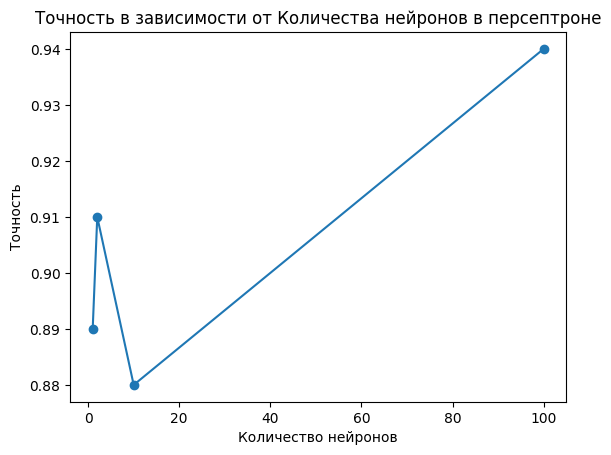

In [5]:
# Создание сгенерированного датасета для бинарной классификации
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Сравнение точности для перцептронов с разным количеством нейронов
neuron_counts = [1, 2, 10, 100]
accuracies = []

for n_neurons in neuron_counts:
    # Создание и обучение перцептрона
    perceptron_model = MLPClassifier(hidden_layer_sizes=(n_neurons,), max_iter=1000, random_state=42)
    perceptron_model.fit(X_train, y_train)

    # Предсказание на тестовом наборе данных
    y_pred = perceptron_model.predict(X_test)

    # Оценка точности
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Перцептрон с {n_neurons} нейронами - Точность: {accuracy:.2f}")

# Визуализация результатов
plt.plot(neuron_counts, accuracies, marker='o')
plt.title('Точность в зависимости от Количества нейронов в персептроне')
plt.xlabel('Количество нейронов')
plt.ylabel('Точность')
plt.show()



## ЗАДАНИЕ №2

Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

Модель с 2 скрытым слоем - Точность: 0.91


d:\Питон 3.12\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Модель с 3 скрытым слоем - Точность: 0.92
Модель с 10 скрытым слоем - Точность: 0.93


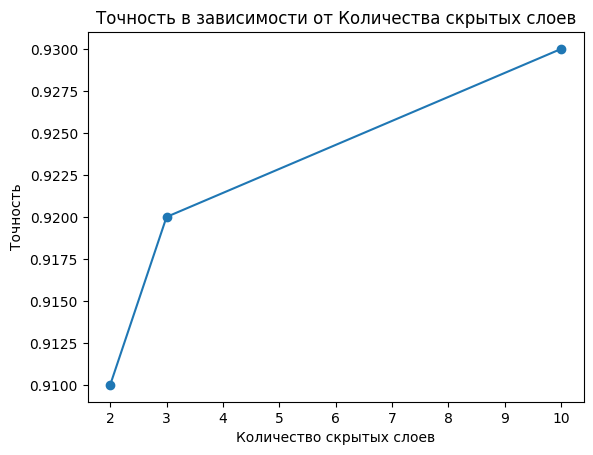

In [16]:

# Создание сгенерированного датасета для бинарной классификации
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Сравнение точности для моделей с разным количеством скрытых слоев
hidden_layer_counts = [2, 3, 10]
neuron_count = 10
accuracies = []

for n_layers in hidden_layer_counts:
    # Создание и обучение модели
    mlp_model = MLPClassifier(hidden_layer_sizes=(neuron_count,) * n_layers, max_iter=1000, random_state=42)
    mlp_model.fit(X_train, y_train)

    # Предсказание на тестовом наборе данных
    y_pred = mlp_model.predict(X_test)

    # Оценка точности
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Модель с {n_layers} скрытым слоем - Точность: {accuracy:.2f}")

# Визуализация результатов
plt.plot(hidden_layer_counts, accuracies, marker='o')
plt.title('Точность в зависимости от Количества скрытых слоев')
plt.xlabel('Количество скрытых слоев')
plt.ylabel('Точность')
plt.show()


## ЗАДАНИЕ №3

Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

In [21]:
# Создание сгенерированного датасета для бинарной классификации
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение глубокого перцептрона
hidden_layers = (5, 5)  # Два скрытых слоя, каждый из которых содержит 5 нейронов
perceptron_model = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=1000, random_state=42)
perceptron_model.fit(X_train, y_train)

# Вывод весов
print("Веса: ")
for i, weights in enumerate(perceptron_model.coefs_):
    print(f"Слой {i} Вес:\n{weights}")

# Вывод смещений
print("\nПредубеждение:")
for i, biases in enumerate(perceptron_model.intercepts_):
    print(f"Слой {i} предубеждение:\n{biases}")


Веса: 
Слой 0 Вес:
[[-1.28364322  1.6919311   0.86206574  0.14891734 -1.42922295]
 [-0.74080257 -1.1562006   0.55351216  0.15502487 -0.31356816]]
Слой 1 Вес:
[[-3.64377618e-01 -1.25620922e-03 -1.91353564e-16  9.53696747e-01
  -2.00311280e-03]
 [ 7.62133045e-01 -4.18933931e-02 -1.94185792e-03 -3.05070086e-01
  -1.11522875e-11]
 [ 9.59534923e-01 -1.79050917e-02 -7.54564210e-19 -2.68324124e-01
  -1.00865846e-01]
 [ 1.36157835e-01 -2.80702968e-02 -8.71291160e-02  6.22785036e-01
   1.10259448e-01]
 [ 5.16081588e-01 -1.23854543e-03 -6.53028322e-02  1.28071273e+00
  -1.78848794e-09]]
Слой 2 Вес:
[[ 1.01635687e+00]
 [-5.47191473e-03]
 [-4.42018167e-16]
 [-7.43532690e-01]
 [-6.81494629e-02]]

Предубеждение:
Слой 0 предубеждение:
[-0.0599063   0.82816729  0.53486904 -0.56391959  0.1958103 ]
Слой 1 предубеждение:
[-0.66366133 -0.0074719  -0.7213222   1.37856704 -0.37369645]
Слой 2 предубеждение:
[0.3902513]


## ЗАДАНИЕ №4

Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

In [24]:
# Создание сгенерированного датасета для бинарной классификации
X, y = make_classification(n_samples=500, n_features=20, n_classes=2, n_informative=10, random_state=42)

# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение глубокого перцептрона с большим количеством нейронов и слоев
hidden_layers = tuple([100] * 10)  # 10 слоев, каждый из которых содержит 100 нейронов
perceptron_model = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=1000, random_state=42)

# Замер времени обучения
start_time = time.time()
perceptron_model.fit(X_train, y_train)
end_time = time.time()

# Вывод времени обучения
print(f"Время обучения: {end_time - start_time:.2f} секунд")

# Предсказание на тестовом наборе данных
y_pred = perceptron_model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на тестовом наборе: {accuracy:.2f}")

Время обучения: 0.63 секунд
Точность на тестовом наборе: 0.90


## ЗАДАНИЕ №5

Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [27]:
# Загрузка датасета Breast Cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели перцептрона
perceptron_model = Perceptron(max_iter=1000, random_state=42)
perceptron_model.fit(X_train_scaled, y_train)

# Предсказание на тестовом наборе данных
y_pred = perceptron_model.predict(X_test_scaled)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Точность на тестовом наборе: {accuracy:.2f}")
print("Матрица ошибок:")
print(conf_matrix)
print("Отчет о классификации:")
print(classification_rep)


Точность на тестовом наборе: 0.97
Матрица ошибок:
[[42  1]
 [ 2 69]]
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## ЗАДАНИЕ №6

Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [ ]:
# Загрузка датасета Diabetes
diabetes = fetch_openml(name="diabetes", version=1)
X = diabetes.data
y = diabetes.target

# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели перцептрона для регрессии
perceptron_regression_model = Perceptron(max_iter=1000, random_state=42)
perceptron_regression_model.fit(X_train_scaled, y_train)

# Предсказание на тестовом наборе данных
y_pred = perceptron_regression_model.predict(X_test_scaled)

# Оценка модели регрессии
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Test Set: {mse:.2f}")
print(f"R-squared on Test Set: {r2:.2f}")
